In [1]:
import pandas as pd
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as mat
import sklearn as skl
import numpy as np

In [2]:
tds = pd.read_csv('titanic.csv')

In [3]:
tds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
tds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


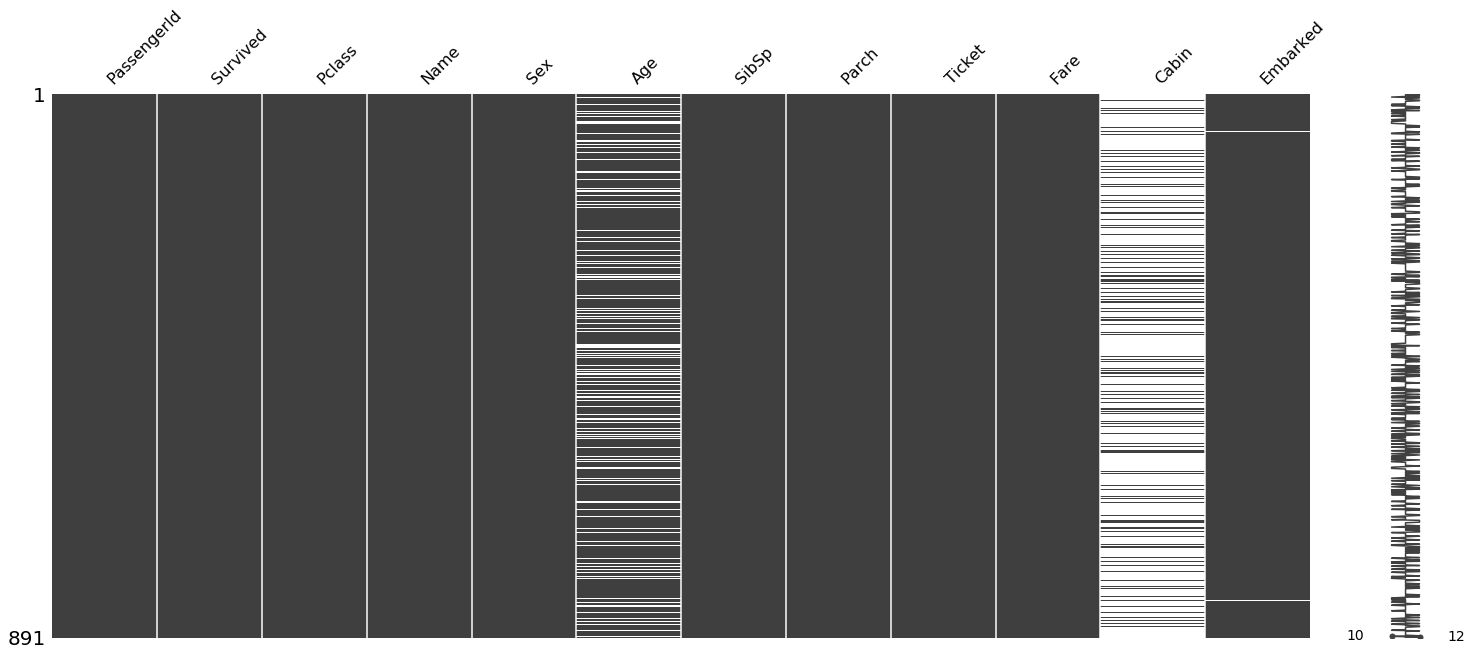

In [6]:
ms.matrix(tds)

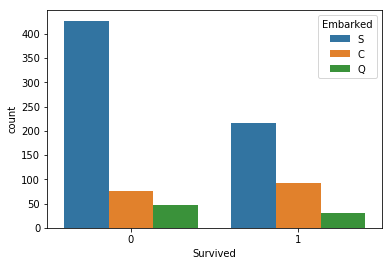

In [7]:
sns.countplot(x = 'Survived', data = tds, hue = 'Embarked')

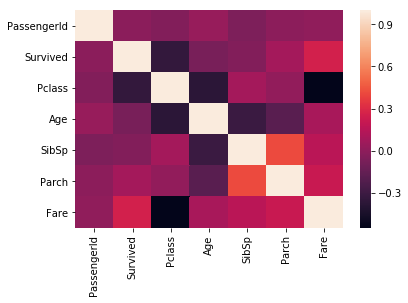

In [8]:
#Pandas slicing the dataframe.
col = list(tds.columns)
stats_df = tds[col[:]]
#Correlation of the different varibles can be known by ".corr()" function on pandas dataframe.
corr = stats_df.corr()
sns.heatmap(corr)

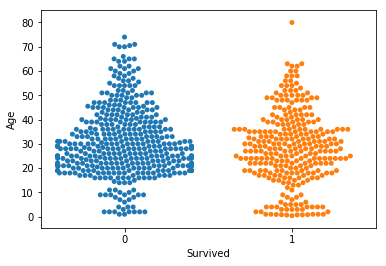

In [9]:
sns.swarmplot(x = 'Survived', y = 'Age', data = tds)

In [10]:
tds = tds.drop('Cabin', axis=1)

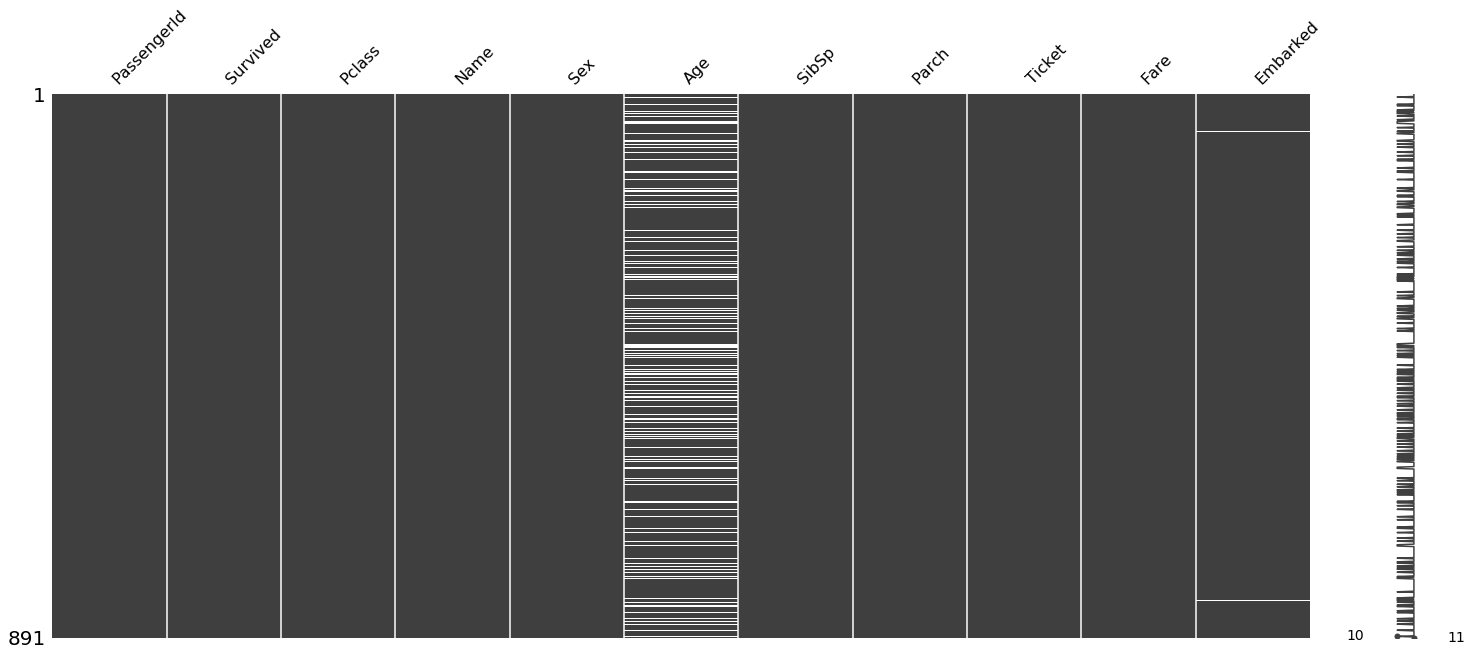

In [11]:
ms.matrix(tds)

In [12]:
tds['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
tds['Embarked'] = tds['Embarked'].fillna('S')

In [14]:
tds['Age'] = tds['Age'].interpolate()

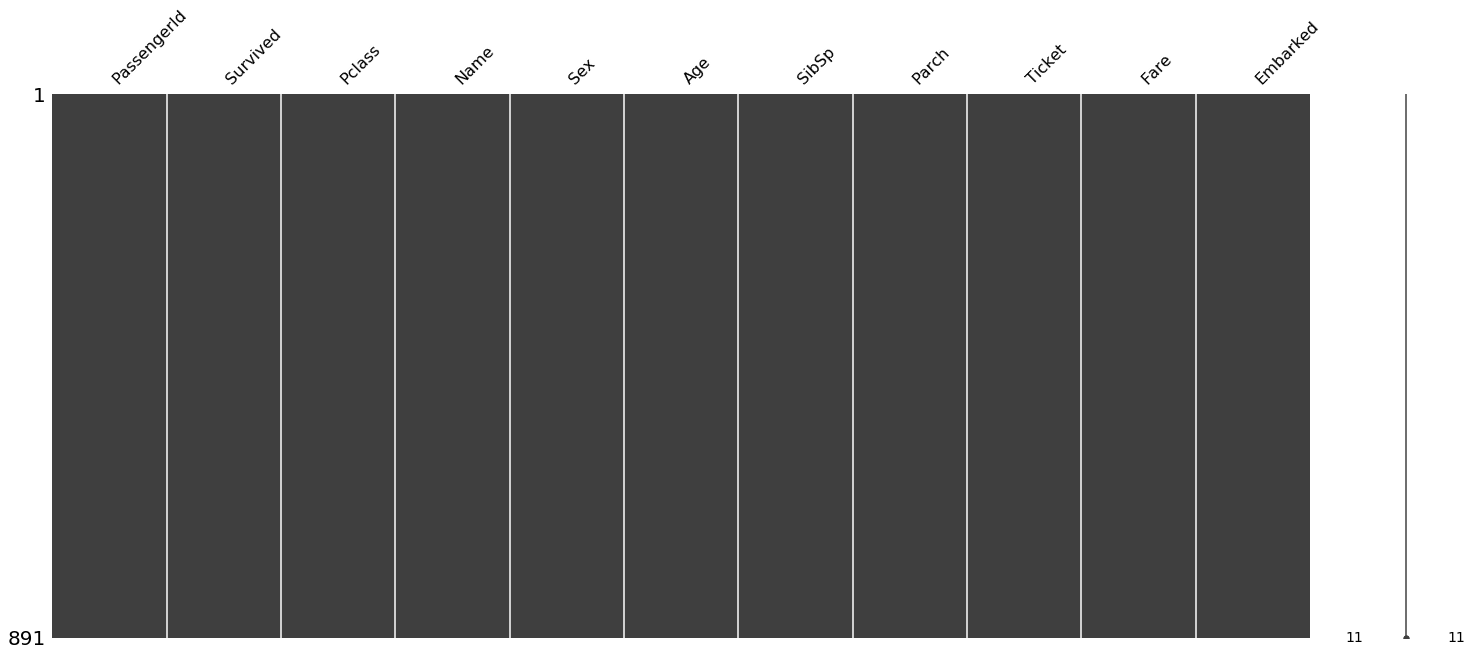

In [15]:
ms.matrix(tds)

In [16]:
tds['family'] = tds['SibSp'] + tds['Parch']
tds = tds.drop(['SibSp', 'Parch'], axis=1)
tds['is_child'] = tds['Age'].apply(lambda x: 1 if x <= 15 else 0)
tds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family,is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


In [17]:
tds['is_female'] = tds['Sex'].apply(lambda x: 1 if x == 'female' else 0)
tds = tds.drop('Sex', axis=1)
tds.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,family,is_child,is_female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,S,0,0,0


In [18]:
tds = tds.drop('Age', axis =1)

In [19]:
tds = tds.drop('Ticket', axis =1)

In [20]:
tds

,PassengerId,Survived,Pclass,Name,Fare,Embarked,family,is_child,is_female
0,1,0,3,"Braund, Mr. Owen Harris",7.2500,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,1,0,1
4,5,0,3,"Allen, Mr. William Henry",8.0500,S,0,0,0
5,6,0,3,"Moran, Mr. James",8.4583,Q,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",51.8625,S,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",21.0750,S,4,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333,S,2,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",30.0708,C,1,1,1


In [21]:
tds = tds.drop('Name', axis =1)

In [22]:
tds

,PassengerId,Survived,Pclass,Fare,Embarked,family,is_child,is_female
0,1,0,3,7.2500,S,1,0,0
1,2,1,1,71.2833,C,1,0,1
2,3,1,3,7.9250,S,0,0,1
3,4,1,1,53.1000,S,1,0,1
4,5,0,3,8.0500,S,0,0,0
5,6,0,3,8.4583,Q,0,0,0
6,7,0,1,51.8625,S,0,0,0
7,8,0,3,21.0750,S,4,1,0
8,9,1,3,11.1333,S,2,0,1
9,10,1,2,30.0708,C,1,1,1


In [23]:
tds=pd.get_dummies(tds)
tds.head(10)

,PassengerId,Survived,Pclass,Fare,family,is_child,is_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,7.2500,1,0,0,0,0,1
1,2,1,1,71.2833,1,0,1,1,0,0
2,3,1,3,7.9250,0,0,1,0,0,1
3,4,1,1,53.1000,1,0,1,0,0,1
4,5,0,3,8.0500,0,0,0,0,0,1
5,6,0,3,8.4583,0,0,0,0,1,0
6,7,0,1,51.8625,0,0,0,0,0,1
7,8,0,3,21.0750,4,1,0,0,0,1
8,9,1,3,11.1333,2,0,1,0,0,1
9,10,1,2,30.0708,1,1,1,1,0,0


In [24]:
y = tds.Survived

In [25]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
X=tds.drop(['Survived'], axis=1)

In [27]:
X

,PassengerId,Pclass,Fare,family,is_child,is_female,Embarked_C,Embarked_Q,Embarked_S
0,1,3,7.2500,1,0,0,0,0,1
1,2,1,71.2833,1,0,1,1,0,0
2,3,3,7.9250,0,0,1,0,0,1
3,4,1,53.1000,1,0,1,0,0,1
4,5,3,8.0500,0,0,0,0,0,1
5,6,3,8.4583,0,0,0,0,1,0
6,7,1,51.8625,0,0,0,0,0,1
7,8,3,21.0750,4,1,0,0,0,1
8,9,3,11.1333,2,0,1,0,0,1
9,10,2,30.0708,1,1,1,1,0,0


In [28]:
X.describe()

,PassengerId,Pclass,Fare,family,is_child,is_female,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,32.204208,0.904602,0.109989,0.352413,0.188552,0.086420,0.725028
std,257.353842,0.836071,49.693429,1.613459,0.313051,0.477990,0.391372,0.281141,0.446751
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,3.000000,31.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
titanic_model = GradientBoostingClassifier(random_state=1)

In [31]:
titanic_model.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [32]:
print("Making predictions for the following 5 passengers:")
print(X.head())
print("The predictions are")
print(titanic_model.predict(X.head()))

Making predictions for the following 5 passengers:
   PassengerId  Pclass     Fare  family  is_child  is_female  Embarked_C  \
0            1       3   7.2500       1         0          0           0   
1            2       1  71.2833       1         0          1           1   
2            3       3   7.9250       0         0          1           0   
3            4       1  53.1000       1         0          1           0   
4            5       3   8.0500       0         0          0           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
The predictions are
[0 1 1 1 0]


In [35]:
test = pd.read_csv('test.csv')

In [36]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


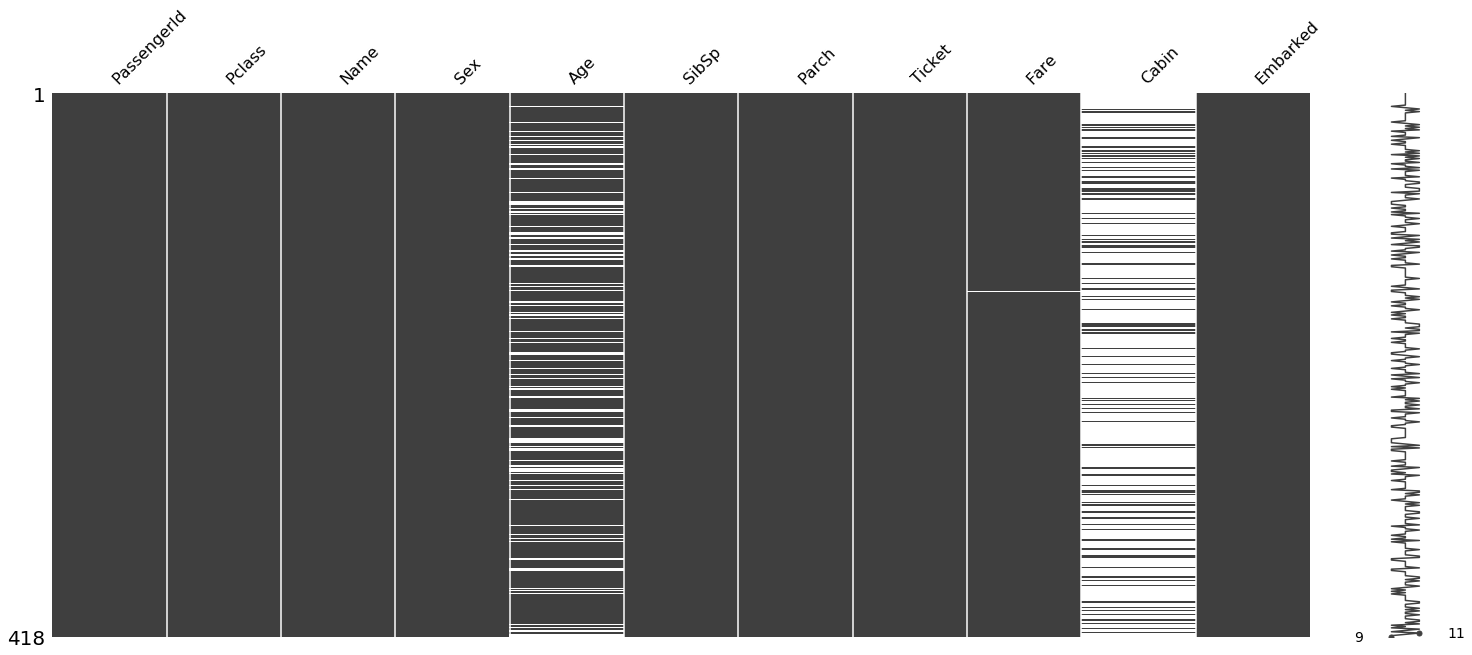

In [37]:
ms.matrix(test)

In [38]:
test = test.drop('Cabin', axis=1)

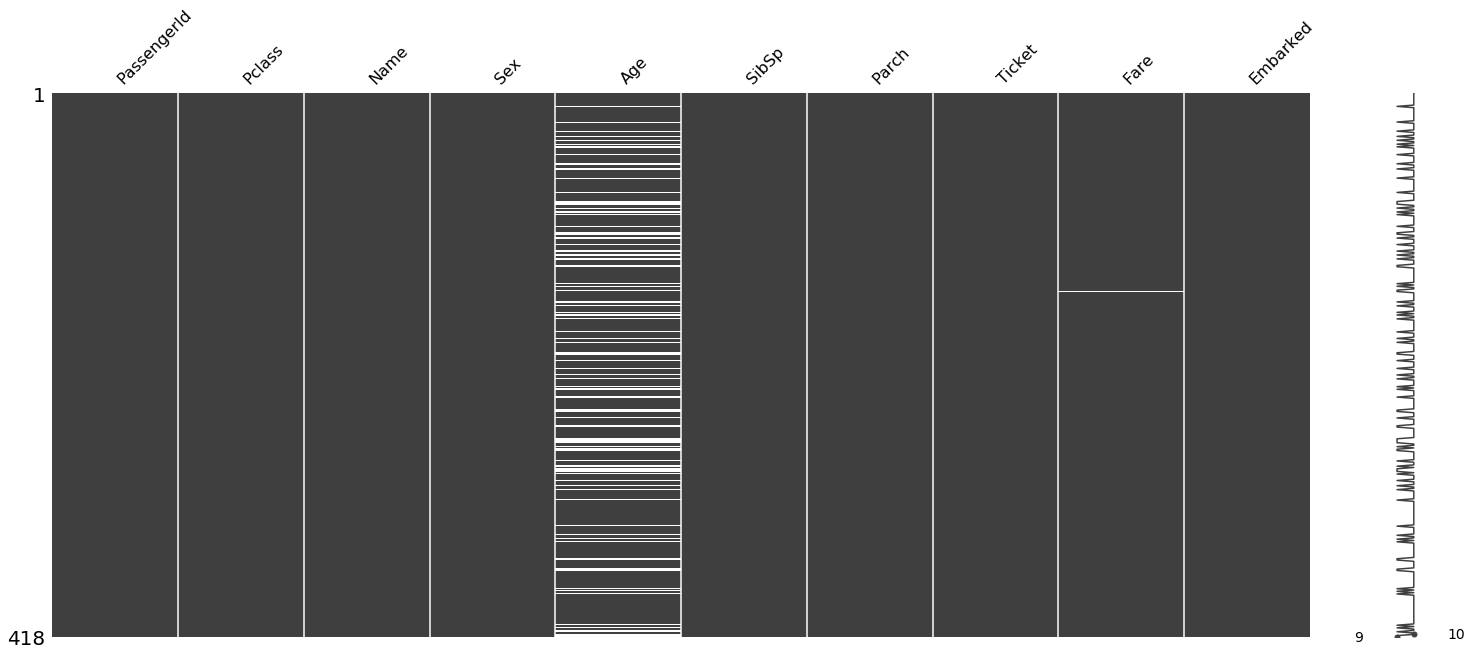

In [39]:
ms.matrix(test)

In [40]:
test['Age'] = test['Age'].interpolate()

In [41]:
test['Fare'].value_counts()

7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
10.5000     11
7.7750      10
7.2292       9
7.2250       9
8.6625       8
7.8542       8
21.0000      8
26.5500      7
7.8792       6
27.7208      6
7.2500       5
7.9250       5
262.3750     5
211.5000     4
69.5500      4
14.5000      4
7.5500       4
7.7958       4
15.2458      4
55.4417      3
31.3875      3
31.5000      3
14.4542      3
9.5000       3
221.7792     3
            ..
50.4958      1
39.4000      1
34.3750      1
7.7208       1
7.8500       1
76.2917      1
7.7250       1
9.2250       1
39.6875      1
75.2500      1
13.8625      1
6.9500       1
61.1750      1
78.8500      1
20.2125      1
247.5208     1
7.5750       1
28.5375      1
227.5250     1
108.9000     1
6.4958       1
7.6292       1
47.1000      1
22.3583      1
17.4000      1
9.3250       1
14.4583      1
15.0333      1
25.4667      1
21.0750      1
Name: Fare, Length: 169, dtype: int64

In [42]:
test['Fare'] = test['Fare'].interpolate()

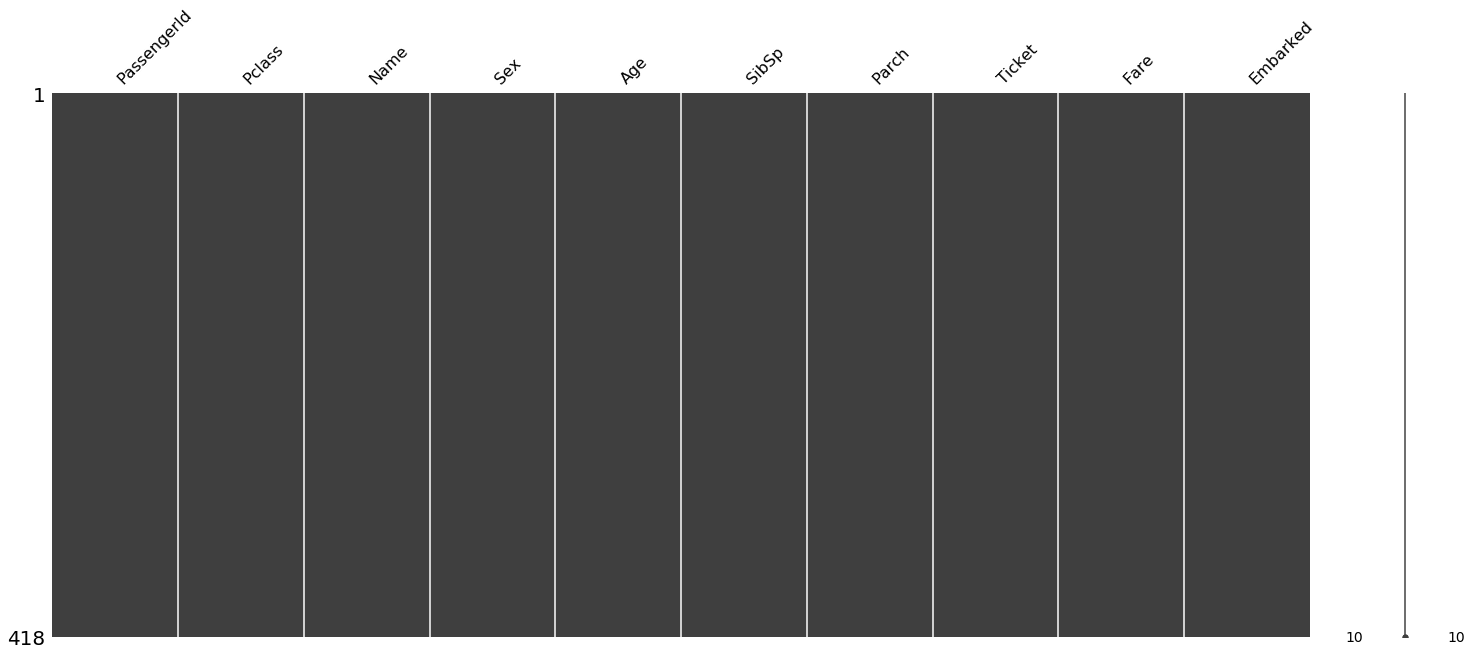

In [43]:
ms.matrix(test)

In [44]:
test['family'] = test['SibSp'] + test['Parch']
test = test.drop(['SibSp', 'Parch'], axis=1)
test['is_child'] = test['Age'].apply(lambda x: 1 if x <= 15 else 0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family,is_child
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,2,0


In [45]:
test['is_female'] = test['Sex'].apply(lambda x: 1 if x == 'female' else 0)
test = test.drop('Sex', axis=1)
test.head()

,PassengerId,Pclass,Name,Age,Ticket,Fare,Embarked,family,is_child,is_female
0,892,3,"Kelly, Mr. James",34.5,330911,7.8292,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,S,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,Q,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,315154,8.6625,S,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,S,2,0,1


In [46]:
test = test.drop('Age', axis =1)
test = test.drop('Name', axis =1)
test = test.drop('Ticket', axis =1)
test

,PassengerId,Pclass,Fare,Embarked,family,is_child,is_female
0,892,3,7.8292,Q,0,0,0
1,893,3,7.0000,S,1,0,1
2,894,2,9.6875,Q,0,0,0
3,895,3,8.6625,S,0,0,0
4,896,3,12.2875,S,2,0,1
5,897,3,9.2250,S,0,1,0
6,898,3,7.6292,Q,0,0,1
7,899,2,29.0000,S,2,0,0
8,900,3,7.2292,C,0,0,1
9,901,3,24.1500,S,2,0,0


In [47]:
test=pd.get_dummies(test)
test.head(10)

,PassengerId,Pclass,Fare,family,is_child,is_female,Embarked_C,Embarked_Q,Embarked_S
0,892,3,7.8292,0,0,0,0,1,0
1,893,3,7.0000,1,0,1,0,0,1
2,894,2,9.6875,0,0,0,0,1,0
3,895,3,8.6625,0,0,0,0,0,1
4,896,3,12.2875,2,0,1,0,0,1
5,897,3,9.2250,0,1,0,0,0,1
6,898,3,7.6292,0,0,1,0,1,0
7,899,2,29.0000,2,0,0,0,0,1
8,900,3,7.2292,0,0,1,1,0,0
9,901,3,24.1500,2,0,0,0,0,1


In [49]:
Xtest = test

In [51]:
print("Making predictions for the following 5 passengers:")
print(Xtest)
print("The predictions are")
print(titanic_model.predict(Xtest))

Making predictions for the following 5 passengers:
     PassengerId  Pclass      Fare  family  is_child  is_female  Embarked_C  \
0            892       3    7.8292       0         0          0           0   
1            893       3    7.0000       1         0          1           0   
2            894       2    9.6875       0         0          0           0   
3            895       3    8.6625       0         0          0           0   
4            896       3   12.2875       2         0          1           0   
5            897       3    9.2250       0         1          0           0   
6            898       3    7.6292       0         0          1           0   
7            899       2   29.0000       2         0          0           0   
8            900       3    7.2292       0         0          1           1   
9            901       3   24.1500       2         0          0           0   
10           902       3    7.8958       0         0          0           0   
1

In [52]:
test

,PassengerId,Pclass,Fare,family,is_child,is_female,Embarked_C,Embarked_Q,Embarked_S
0,892,3,7.8292,0,0,0,0,1,0
1,893,3,7.0000,1,0,1,0,0,1
2,894,2,9.6875,0,0,0,0,1,0
3,895,3,8.6625,0,0,0,0,0,1
4,896,3,12.2875,2,0,1,0,0,1
5,897,3,9.2250,0,1,0,0,0,1
6,898,3,7.6292,0,0,1,0,1,0
7,899,2,29.0000,2,0,0,0,0,1
8,900,3,7.2292,0,0,1,1,0,0
9,901,3,24.1500,2,0,0,0,0,1


In [54]:
test1 = titanic_model.predict(Xtest)
test1

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

the predictions displayed above.

In [55]:
np.savetxt("submission2.csv", test1, delimiter=",")

In [56]:
titanic_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)